# National Survey on Drug Use and Health

http://datafiles.samhsa.gov/study-dataset/nsduh-2002-2017-ds0001-nsduh-2002-2017-ds0001-nid18471

In [109]:
# from jupyterthemes import jtplot

# jtplot.style()

In [83]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Feature Extraction:

WORKDAYS - days missed work for injury/illness past 30 days

HEALTH - Overall health: excellent = 1, very good = 2, good = 3, fair = 4, or poor = 5

HLTINMNT - mental or emotional difficulties: 1 = yes, 2 = no

MRDAYPMO - days per month used marijuana/hashish past 12 months

MTDAYPMO - days per month used methamphetamine past 12 months

OXDAYPMO - days per month used oxycontin past 12 months

PRDAYPMO - days per month used pain reliever past 12 months

STDAYPMO - days per month used stimulant past 12 months

TRDAYPMO - days per month used tranquilizers past 12 months

ALDAYPMO - days per month drank alcohol past 12 months

CCDAYPMO - days per month used cocaine past 12 months

CRDAYPMO - days per month used crack past 12 months

HLDAYPMO - days per month used hallucinogen past 12 months

HRDAYPMO - days per month used heroin past 12 months

INDAYPMO - days per month used inhalant past 12 months

SVDAYPMO - days per month used sedative past 12 months

To consider:

ANXDYR - had anxiety in past year: 0 = no, 1 = yes

DEPRSYR - had depression in past year: 0 = no, 1 = yes

In [84]:
index = ['YEAR']
drug_use = ['ALDAYPMO', 'MRDAYPMO', 'CCDAYPMO', 'CRDAYPMO',
            'HRDAYPMO', 'HLDAYPMO', 'INDAYPMO', 'PRDAYPMO',
            'OXDAYPMO', 'TRDAYPMO', 'STDAYPMO', 'MTDAYPMO',
            'SVDAYPMO']
health = ['WORKDAYS', 'HEALTH', 'HLTINMNT']
features = index + drug_use + health

In [85]:
import csv

def reduce_file_size(in_file, out_file, columns):
    with open(in_file) as f_in, open(out_file, 'w+') as f_out:
        reader = csv.reader(f_in, delimiter='\t')
        writer = csv.writer(f_out)
        header = reader.__next__()
        column_indices = [header.index(column) for column in columns]
        
        writer.writerow(columns)
        
        for row in reader:
            line = [row[index] for index in column_indices]
            writer.writerow(line)

In [86]:
# WARNING: takes a long time

base_dir = './datasets/nsduh/'
in_file = base_dir + 'NSDUH_2002_2017_Tab.tsv'
out_file = base_dir + 'NSDUH_2002_2017_reduced.csv'
# reduce_file_size(in_file, out_file, features)

In [87]:
df = pd.read_csv('./datasets/nsduh/NSDUH_2002_2017_reduced.csv')
df.head()

,YEAR,ALDAYPMO,MRDAYPMO,CCDAYPMO,CRDAYPMO,HRDAYPMO,HLDAYPMO,INDAYPMO,PRDAYPMO,OXDAYPMO,TRDAYPMO,STDAYPMO,MTDAYPMO,SVDAYPMO,WORKDAYS,HEALTH,HLTINMNT
0,2002,10,93,93,91,91,93,91,93,-9,91,93,93,91,0,2,1
1,2002,2,93,91,91,91,91,91,91,-9,91,91,91,91,0,2,94
2,2002,4,15,91,91,91,91,91,99,-9,91,91,91,91,99,1,98
3,2002,5,93,91,91,91,93,93,91,-9,91,91,91,91,99,1,1
4,2002,99,91,91,91,91,91,91,91,-9,91,91,91,91,99,3,1


In [88]:
df.shape

(892972, 17)

In [89]:
df.describe()

,YEAR,ALDAYPMO,MRDAYPMO,CCDAYPMO,CRDAYPMO,HRDAYPMO,HLDAYPMO,INDAYPMO,PRDAYPMO,OXDAYPMO,TRDAYPMO,STDAYPMO,MTDAYPMO,SVDAYPMO,WORKDAYS,HEALTH,HLTINMNT
count,892972.000000,892972.000000,892972.000000,892972.000000,892972.000000,892972.000000,892972.000000,892972.000000,892972.000000,892972.000000,892972.000000,892972.000000,892972.000000,892972.000000,892972.000000,892972.000000,892972.000000
mean,2009.544690,75.990027,88.800285,90.851252,90.983961,90.990603,71.945774,71.925475,71.151421,59.324155,71.655388,71.778320,71.891197,71.915431,36.464856,2.160910,53.342246
std,4.603969,37.105155,17.870430,6.764294,2.922288,2.229186,39.723966,39.581040,40.327629,46.305426,39.732707,39.601716,39.400949,39.363381,49.374866,1.605658,48.032699
min,2002.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,1.000000,1.000000
25%,2006.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,-9.000000,91.000000,91.000000,91.000000,91.000000,0.000000,1.000000,1.000000
50%,2010.000000,93.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,0.000000,2.000000,94.000000
75%,2014.000000,99.000000,93.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,99.000000,3.000000,99.000000
max,2017.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,97.000000,99.000000


In [90]:
coding = {
    81: ('?', np.NaN),
    83: ('?', np.NaN),
    85: ('Bad data', np.NaN),
    89: ('Legitimate skip', np.NaN),
    90: ('?', np.NaN),
    91: ('Never used', 0),
    93: ('Did not use in past 12 months', 0),
    94: ("Don't know", np.NaN),
    97: ('Refused', np.NaN),
    98: ('Blank', np.NaN),
    99: ('Legitimate skip', np.NaN)
}

In [91]:
for column in features[1:]:
    for code, value in coding.items():
        df[column][df[column] == code] = value[1]
    df[column][df[column] < 0] = np.NaN
df.describe()

df['HLTINMNT'][df['HLTINMNT'] == 2] = 0

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


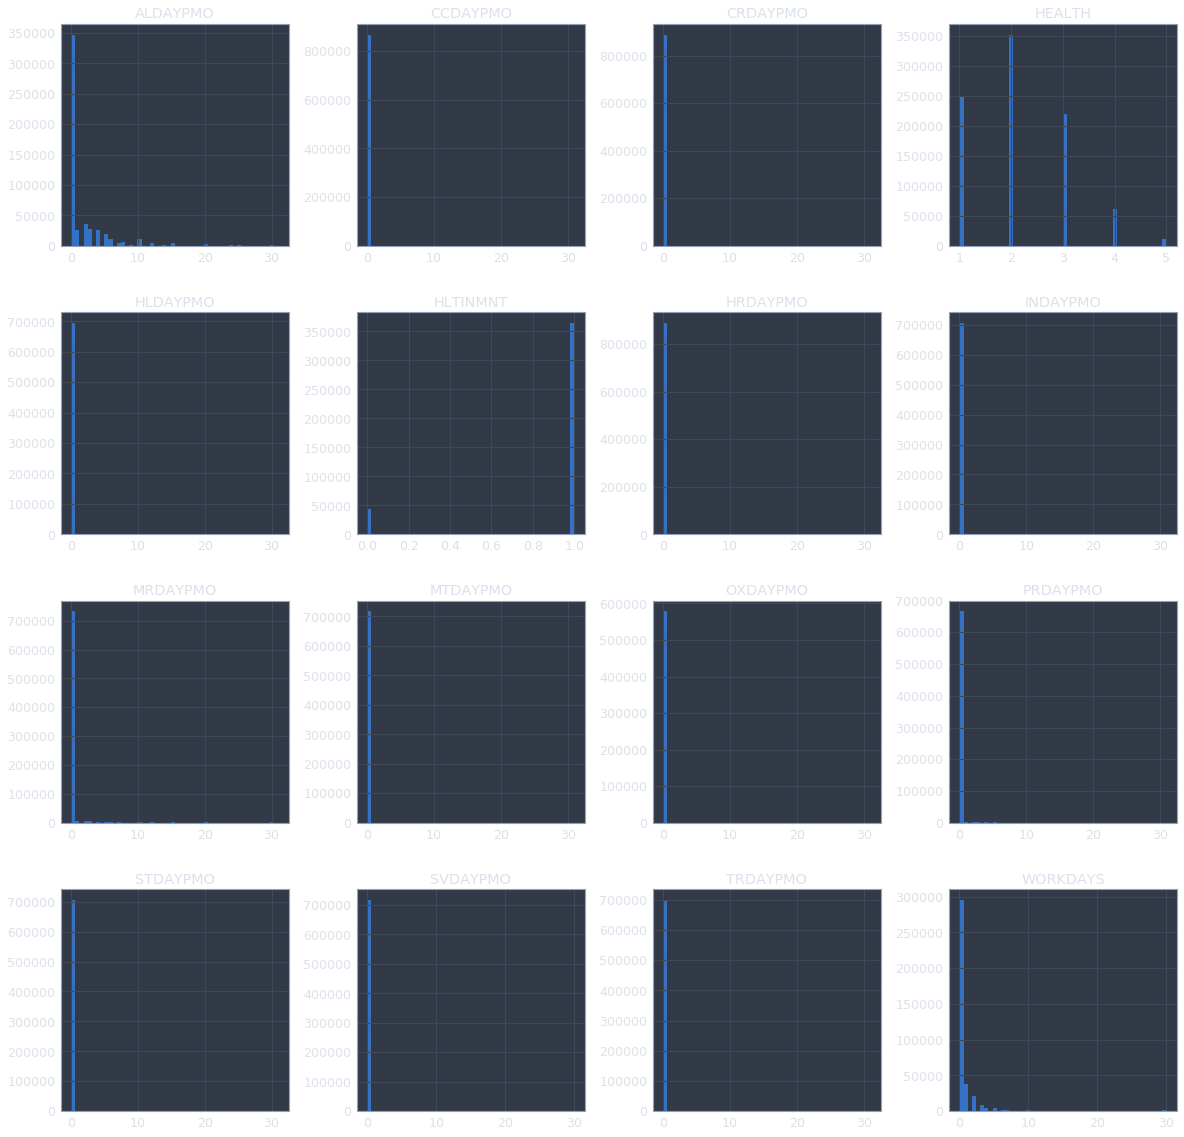

In [92]:
df[drug_use + health].hist(figsize=(20, 20), bins=50)
plt.show()

In [93]:
df.groupby('YEAR').count()

,ALDAYPMO,MRDAYPMO,CCDAYPMO,CRDAYPMO,HRDAYPMO,HLDAYPMO,INDAYPMO,PRDAYPMO,OXDAYPMO,TRDAYPMO,STDAYPMO,MTDAYPMO,SVDAYPMO,WORKDAYS,HEALTH,HLTINMNT
YEAR,,,,,,,,,,,,,,,,
2002,32338,46626,52475,53738,53936,51757,52844,50647,0,52792,52916,53572,53755,30066,54071,27813
2003,32997,47701,53603,54874,55079,53286,53979,51635,0,53865,54116,54750,54881,29951,55219,26880
2004,33337,48266,54001,55288,55445,53701,54252,51913,52291,54216,54423,55118,55219,29974,55590,26702
2005,33433,48693,54350,55577,55748,54076,54533,52248,52641,54468,54817,55456,55539,30385,55891,26279
2006,32964,48151,53497,54722,54866,53269,53878,51412,51922,53692,53960,54614,54643,29825,55020,25533
2007,32959,48121,53557,54726,54910,53261,53890,51445,51997,53719,54067,54701,54688,30137,55040,25072
2008,33286,48060,53721,54857,54940,53250,54005,51477,51973,53709,54220,54860,54788,29543,55100,24915
2009,33249,47594,53972,55013,55041,53238,54148,51600,52014,53756,54267,54941,54873,27917,55226,24274
2010,34787,49337,56183,57116,57141,55259,56199,53873,54077,55891,56366,57057,56959,28511,57305,25062


In [94]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer()
imp.fit(df)

SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0)

In [95]:
df_imp = imp.transform(df)
df_imp = pd.DataFrame(df_imp, columns=df.columns)

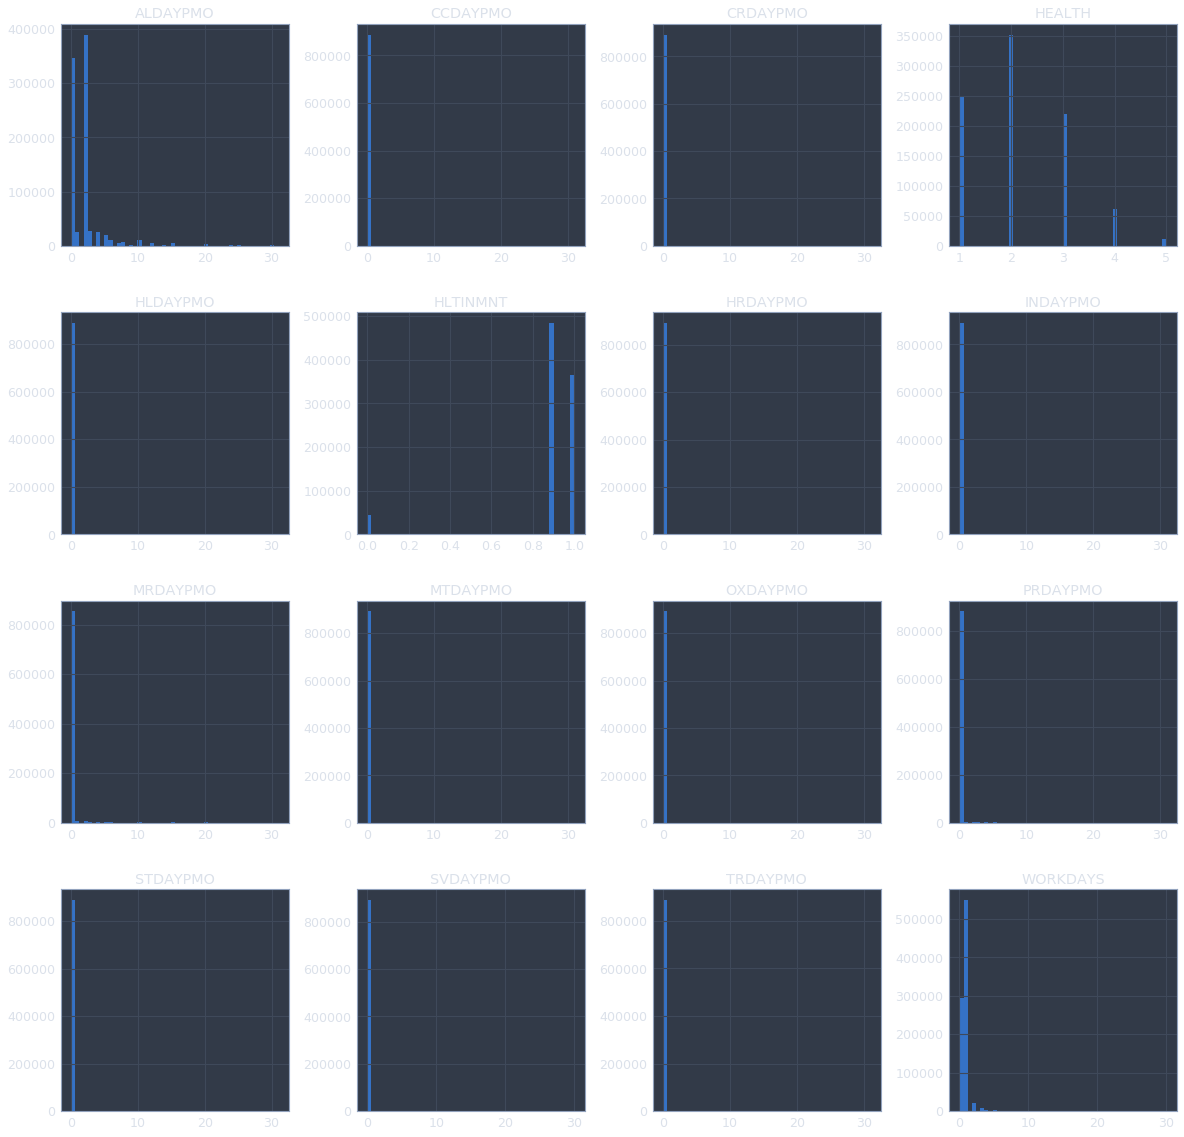

In [96]:
df_imp[drug_use + health].hist(figsize=(20, 20), bins=50)
plt.show()

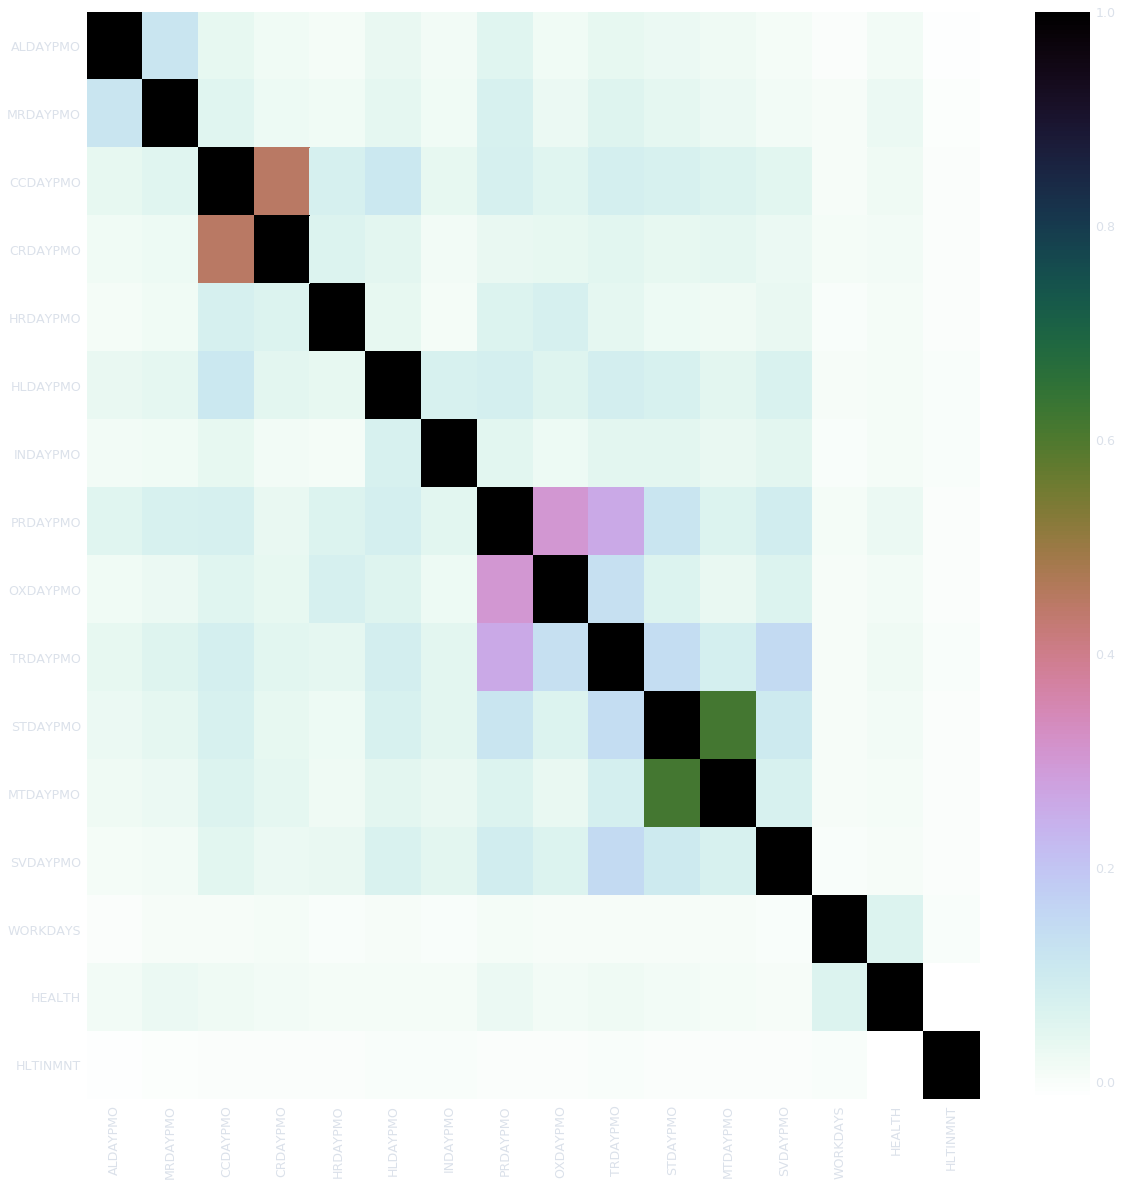

In [97]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_imp[drug_use + health].corr(), cmap='cubehelix_r')
plt.show()

In [98]:
df_imp.dtypes

YEAR        float64
ALDAYPMO    float64
MRDAYPMO    float64
CCDAYPMO    float64
CRDAYPMO    float64
HRDAYPMO    float64
HLDAYPMO    float64
INDAYPMO    float64
PRDAYPMO    float64
OXDAYPMO    float64
TRDAYPMO    float64
STDAYPMO    float64
MTDAYPMO    float64
SVDAYPMO    float64
WORKDAYS    float64
HEALTH      float64
HLTINMNT    float64
dtype: object

In [99]:
for column in features:
    df_imp[column] = df_imp[column].astype(np.int16)

df_imp.dtypes

YEAR        int16
ALDAYPMO    int16
MRDAYPMO    int16
CCDAYPMO    int16
CRDAYPMO    int16
HRDAYPMO    int16
HLDAYPMO    int16
INDAYPMO    int16
PRDAYPMO    int16
OXDAYPMO    int16
TRDAYPMO    int16
STDAYPMO    int16
MTDAYPMO    int16
SVDAYPMO    int16
WORKDAYS    int16
HEALTH      int16
HLTINMNT    int16
dtype: object

In [100]:
# df_imp.to_csv('./datasets/nsduh/NSDUH_2002_2017_reduced_imputed.csv', index=False)

In [101]:
from sklearn.model_selection import train_test_split

_, df_samp = train_test_split(df_imp,
                              test_size=0.02,
                              stratify=df_imp['YEAR'],
                              random_state=42)
df_samp.shape

(17860, 17)

In [102]:
df_samp.describe()

,YEAR,ALDAYPMO,MRDAYPMO,CCDAYPMO,CRDAYPMO,HRDAYPMO,HLDAYPMO,INDAYPMO,PRDAYPMO,OXDAYPMO,TRDAYPMO,STDAYPMO,MTDAYPMO,SVDAYPMO,WORKDAYS,HEALTH,HLTINMNT
count,17860.000000,17860.000000,17860.000000,17860.000000,17860.000000,17860.000000,17860.000000,17860.000000,17860.000000,17860.000000,17860.000000,17860.000000,17860.000000,17860.000000,17860.000000,17860.000000,17860.000000
mean,2009.544401,1.585218,0.296809,0.023348,0.005991,0.002856,0.012766,0.010806,0.066349,0.008287,0.034546,0.029171,0.010526,0.002688,0.324804,2.141825,0.402912
std,4.604388,3.338738,2.028682,0.492696,0.261192,0.120392,0.334905,0.324876,0.753898,0.242333,0.628374,0.646475,0.328229,0.165281,1.833406,0.950648,0.490497
min,2002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2006.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2010.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,2014.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
max,2017.000000,31.000000,31.000000,24.000000,23.000000,10.000000,25.000000,24.000000,26.000000,12.000000,30.000000,30.000000,20.000000,16.000000,30.000000,5.000000,1.000000


In [103]:
df_samp[drug_use + health].corr()

,ALDAYPMO,MRDAYPMO,CCDAYPMO,CRDAYPMO,HRDAYPMO,HLDAYPMO,INDAYPMO,PRDAYPMO,OXDAYPMO,TRDAYPMO,STDAYPMO,MTDAYPMO,SVDAYPMO,WORKDAYS,HEALTH,HLTINMNT
ALDAYPMO,1.000000,0.096937,0.027741,0.032258,-0.001929,0.011096,-0.000255,0.027863,0.032416,0.044917,0.032431,0.017269,-0.001125,0.036811,-0.000289,0.007925
MRDAYPMO,0.096937,1.000000,0.060852,0.031516,-0.002553,0.011812,0.022490,0.087768,0.085318,0.076599,0.034385,0.013051,-0.002379,0.021697,0.031914,-0.023344
CCDAYPMO,0.027741,0.060852,1.000000,0.533670,0.076283,0.026359,0.019063,0.101051,0.108120,0.142626,0.049194,0.068769,0.006105,0.003258,0.013014,-0.004406
CRDAYPMO,0.032258,0.031516,0.533670,1.000000,0.081367,0.014489,0.024972,0.008787,0.067334,0.027397,0.011898,0.016899,0.010003,0.004706,0.006049,-0.001797
HRDAYPMO,-0.001929,-0.002553,0.076283,0.081367,1.000000,0.029648,0.010664,0.134869,0.102828,0.099358,0.004685,-0.000761,0.022126,-0.003187,0.004778,0.005169
HLDAYPMO,0.011096,0.011812,0.026359,0.014489,0.029648,1.000000,0.015201,0.023701,0.013185,0.027172,0.011470,0.002853,0.010507,0.006378,0.011373,-0.014611
INDAYPMO,-0.000255,0.022490,0.019063,0.024972,0.010664,0.015201,1.000000,0.011933,0.003130,-0.001280,-0.000701,-0.001067,-0.000541,-0.002979,0.006459,-0.006241
PRDAYPMO,0.027863,0.087768,0.101051,0.008787,0.134869,0.023701,0.011933,1.000000,0.289383,0.173287,0.126657,0.008265,0.027778,0.014467,0.029528,-0.010214
OXDAYPMO,0.032416,0.085318,0.108120,0.067334,0.102828,0.013185,0.003130,0.289383,1.000000,0.111376,0.029195,-0.001097,0.013424,-0.001143,0.016773,-0.010661
TRDAYPMO,0.044917,0.076599,0.142626,0.027397,0.099358,0.027172,-0.001280,0.173287,0.111376,1.000000,0.168302,0.158957,0.001263,0.012569,0.016919,0.007159


In [104]:
df_year_totals = df_samp.groupby(['YEAR']).sum()

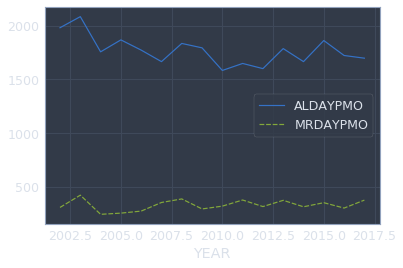

In [105]:
sns.lineplot(data=df_year_totals[['ALDAYPMO', 'MRDAYPMO']])
plt.show()

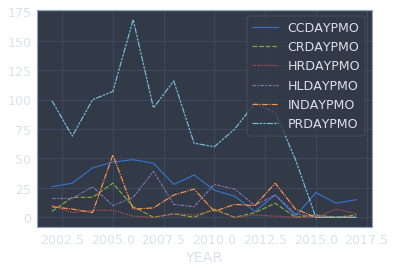

In [106]:
sns.lineplot(data=df_year_totals[features[3:9]])
plt.show()

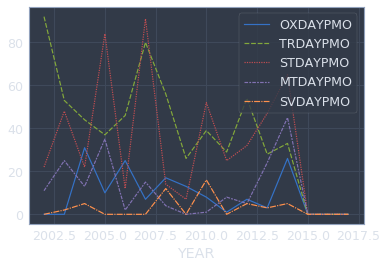

In [107]:
sns.lineplot(data=df_year_totals[features[9:14]])
plt.show()